# 1. Importación de librerías



In [123]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carga del dataset

In [124]:
# Ruta del archivo en Google Drive
file_path = 'https://raw.githubusercontent.com/AlexPrietoRomani/Predicci-n_Renta/main/precios-inmobiliarios-bd-desagregada-venta-2024-1.csv'

# Lectura del archivo CSV en un DataFrame de Pandas
df_state = pd.read_csv(file_path, delimiter=";", on_bad_lines='warn', dtype={
    'Trimestre':str,
    'Distrito': str,
    'Número de habitaciones': str,
    'Número de baños': str,
    'Número de garajes': str,
    'Piso de ubicación': str,
    'Vista al exterior': str,
})


C:\Users\alexa\AppData\Local\Temp\ipykernel_21452\3753137167.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_state = pd.read_csv(file_path, delimiter=";", on_bad_lines='warn', dtype={




* 'Año': Año de colecta de data
* 'Trimestre': Trimestre del año
* 'Precio en dólares corrientes': Precio de venta en dolares
* 'Tipo de cambio': Tipo de cambio a dolares en la fecha
* 'IPC': Índice de Precios al Consumidor
* 'Precio en soles corrientes': Precio de venta en soles
* 'Precio en soles constantes de 2009': Representa el precio de un bien o servicio ajustado por la inflación, usando el año 2009 como año base
* 'Distrito': Distrito de el inmueble
* 'Superficie ': Superficie
* 'Número de habitaciones': Número de habitaciones
* 'Número de baños': Número de baños
* 'Número de garajes': Número de garajes
* 'Piso de ubicación': Ubicación en altura del inmueble
* 'Vista al exterior': 0 si no posee vista al exterior y 1 si posee
* 'Años de antigüedad': Años de antiguedad del inmueble

# 3. Problemas propuestos

## Indicar el tamaño del conjunto de datos

In [125]:
df_state.shape

(96587, 16)

In [126]:
df_state.columns

Index(['Unnamed: 0', 'Año', 'Trimestre', 'Precio en dólares corrientes',
       'Tipo de cambio', 'IPC', 'Precio en soles corrientes',
       'Precio en soles constantes de 2009', 'Distrito', 'Superficie ',
       'Número de habitaciones', 'Número de baños', 'Número de garajes',
       'Piso de ubicación', 'Vista al exterior', 'Años de antigüedad'],
      dtype='object')

In [127]:
df_state.head()

Unnamed: 0   Año Trimestre Precio en dólares corrientes  Tipo de cambio  \
0     1998-1  1998         1                      140,000            2.78   
1     1998-1  1998         1                       69,800            2.78   
2     1998-1  1998         1                       39,900            2.78   
3     1998-1  1998         1                      105,000            2.78   
4     1998-1  1998         1                       78,000            2.78   

     IPC Precio en soles corrientes Precio en soles constantes de 2009  \
0  73.13                    389,580                            532,724   
1  73.13                    194,234                            265,601   
2  73.13                    111,030                            151,826   
3  73.13                    292,185                            399,543   
4  73.13                    217,052                            296,803   

     Distrito  Superficie  Número de habitaciones Número de baños  \
0   La Molina          155                      3               1   
1  Miraflores          120                      3               1   
2  Miraflores          100                      3               1   
3  Miraflores          150                      3               1   
4   San Borja          125                      3               1   

  Número de garajes Piso de ubicación Vista al exterior Años de antigüedad  
0                 0                 2                 0                  3  
1                 0                 8                 0                 10  
2                 0                 9                 0                  0  
3                 0                 4                 0                  0  
4                 0                 1                 0                  3

In [128]:
df_state.tail()

Unnamed: 0   Año Trimestre Precio en dólares corrientes  Tipo de cambio  \
96582     2024-1  2024         1                      100,000            3.76   
96583     2024-1  2024         1                      128,000            3.76   
96584     2024-1  2024         1                       88,000            3.76   
96585     2024-1  2024         1                       95,000            3.76   
96586     2024-1  2024         1                      149,002            3.76   

          IPC Precio en soles corrientes Precio en soles constantes de 2009  \
96582  162.44                    375,922                            231,429   
96583  162.44                    481,181                            296,229   
96584  162.44                    330,812                            203,658   
96585  162.44                    357,126                            219,858   
96586  162.44                    560,132                            344,834   

        Distrito  Superficie  Número de habitaciones Número de baños  \
96582  Surquillo           66                      3               2   
96583  Surquillo           61                      2               2   
96584  Surquillo           77                      3               2   
96585  Surquillo           62                      3               2   
96586  Surquillo           73                      3               2   

      Número de garajes Piso de ubicación Vista al exterior Años de antigüedad  
96582                 0                 0                 1                 19  
96583                 1                 0                 1                  3  
96584                 0                 0                 1                 13  
96585                 0                 0                 1                  7  
96586                 0                 0                 1                  0

### Cambiando nombres de las columnas

In [129]:
# Copiando dataframe para realizar cambios
df_state_new = df_state.copy()

# Cambiando nombres de las columnas para un mejor trabajo
df_state_new = df_state_new.rename(columns={
    'Año': 'year',
    'Trimestre': 'quarter',
    'Precio en dólares corrientes': 'price',
    'Tipo de cambio': 'exchange_rate',
    'IPC': 'ipc',
    'Precio en soles corrientes': 'price_soles',
    'Precio en soles constantes de 2009': 'price_soles_constant',
    'Distrito': 'state',
    'Superficie ': 'lot_m2',
    'Número de habitaciones': 'bed',
    'Número de baños': 'bath',
    'Número de garajes': 'garage',
    'Piso de ubicación': 'floor_location',
    'Vista al exterior': 'exterior_view',
    'Años de antigüedad': 'years_old'
})

# Eliminando columnas innecesarias
df_state_new.drop(['Unnamed: 0'], axis=1, inplace=True)

# Verificando nombres de las columnas
df_state_new.columns

Index(['year', 'quarter', 'price', 'exchange_rate', 'ipc', 'price_soles',
       'price_soles_constant', 'state', 'lot_m2', 'bed', 'bath', 'garage',
       'floor_location', 'exterior_view', 'years_old'],
      dtype='object')

In [130]:
#Asegurandonos de que todos los estados tengan una buena cantidad de muestras
state_counts = df_state_new.groupby('state').size().reset_index()
print(state_counts)

              state      0
0       Ate Vitarte    536
1          Barranco   2708
2        Bellavista    997
3             Breña   1719
4        Carabayllo    602
5   Cercado de Lima   2470
6        Chorrillos   3242
7             Comas    292
8       Jesús María   4423
9         LA MOLINA      6
10            LInce      2
11        La Molina   7686
12         La Perla   1064
13      La Victoria    380
14         La perla      1
15            Lince   3532
16       Los Olivos   2138
17       Los olivos      4
18       MIRAFLORES     13
19        Magdalena   5333
20       Miraflores  13499
21     Pueblo Libre   4360
22     Pueblo libre      6
23        SAN BORJA      8
24       SAN ISIDRO      5
25            SURCO      8
26        San Borja   9057
27       San Isidro   8428
28       San Miguel   6417
29        San borja      1
30       San isidro      1
31       San miguel      8
32            Surco  14154
33        Surquillo   3403
34            breña      4
35            lince      2
3

## Especificar las variables de cada tipo

In [131]:
df_state_new.dtypes

year                      int64
quarter                  object
price                    object
exchange_rate           float64
ipc                     float64
price_soles              object
price_soles_constant     object
state                    object
lot_m2                    int64
bed                      object
bath                     object
garage                   object
floor_location           object
exterior_view            object
years_old                object
dtype: object

In [132]:
df_state_new.head()

year quarter    price  exchange_rate    ipc price_soles  \
0  1998       1  140,000           2.78  73.13     389,580   
1  1998       1   69,800           2.78  73.13     194,234   
2  1998       1   39,900           2.78  73.13     111,030   
3  1998       1  105,000           2.78  73.13     292,185   
4  1998       1   78,000           2.78  73.13     217,052   

  price_soles_constant       state  lot_m2 bed bath garage floor_location  \
0              532,724   La Molina     155   3    1      0              2   
1              265,601  Miraflores     120   3    1      0              8   
2              151,826  Miraflores     100   3    1      0              9   
3              399,543  Miraflores     150   3    1      0              4   
4              296,803   San Borja     125   3    1      0              1   

  exterior_view years_old  
0             0         3  
1             0        10  
2             0         0  
3             0         0  
4             0         3

In [133]:
# Visualizando las columnas de tipo "object"
for i in list(df_state_new.select_dtypes(include = "object").columns):
    lista = list(df_state_new[i].unique())[:10]
    
    print(f"Primeros 10 valores de la columna: {i}")
    print(lista)

Primeros 10 valores de la columna: quarter
['1', '2', '3', '4']
Primeros 10 valores de la columna: price
['140,000', '69,800', '39,900', '105,000', '78,000', '72,000', '158,000', '585,000', '198,000', '65,000']
Primeros 10 valores de la columna: price_soles
['389,580', '194,234', '111,030', '292,185', '217,052', '200,356', '439,669', '1,627,888', '550,978', '180,876']
Primeros 10 valores de la columna: price_soles_constant
['532,724', '265,601', '151,826', '399,543', '296,803', '273,972', '601,217', '2,226,025', '753,424', '247,336']
Primeros 10 valores de la columna: state
['La Molina', 'Miraflores', 'San Borja', 'San Isidro', 'Surco', 'Barranco', 'Bellavista', 'Cercado de Lima', 'Chorrillos', 'Jesús María']
Primeros 10 valores de la columna: bed
['3', '2', '4', '7', '5', '1', '6', '8', '9', '#N/D']
Primeros 10 valores de la columna: bath
['1', '2', '3', '4', '5', '6', '8', '#N/D', '9', nan]
Primeros 10 valores de la columna: garage
['0', '1', '2', '4', '3', '5', '#N/D']
Primeros 10 v

In [134]:
# Creando copia antes del cambio
df_state_new_copy = df_state_new.copy()

# Cambiando a columnas numericas las variables
list_numeric = ['price', 'price_soles', 'price_soles_constant']

for column in list_numeric:
  # Cambiando todas las columnas a texto
  df_state_new_copy[column] = df_state_new_copy[column].astype(str)

  # Cambiando la coma en los datos dados por un vacio
  df_state_new_copy[column] = df_state_new_copy[column].str.replace(',', '', regex=True)

  # Cambiando a un tipo númerico
  df_state_new_copy[column] = pd.to_numeric(df_state_new_copy[column], errors='coerce')

# Verificando cambio de tipo
df_state_new_copy.dtypes

year                      int64
quarter                  object
price                   float64
exchange_rate           float64
ipc                     float64
price_soles               int64
price_soles_constant      int64
state                    object
lot_m2                    int64
bed                      object
bath                     object
garage                   object
floor_location           object
exterior_view            object
years_old                object
dtype: object

In [135]:
# Cambiando todos los valores de las columnas "object" a tipo objetos
#? Debido a que estas contienen tipo int y str dentro de ella.
for i in list(df_state_new_copy.select_dtypes(include = "object").columns):
    df_state_new_copy[i] = df_state_new_copy[i].astype(str)
    
    df_state_new_copy[i].replace('#N/D',None, inplace=True)
    df_state_new_copy[i].replace('nan',None, inplace=True)
    df_state_new_copy[i].replace('None',None, inplace=True)
    
    lista = list(df_state_new_copy[i].unique())[:15]
    
    print(f"Primeros 10 valores de la columna: {i}")
    print(lista)

Primeros 10 valores de la columna: quarter
['1', '2', '3', '4']
Primeros 10 valores de la columna: state
['La Molina', 'Miraflores', 'San Borja', 'San Isidro', 'Surco', 'Barranco', 'Bellavista', 'Cercado de Lima', 'Chorrillos', 'Jesús María', 'La Perla', 'Lince', 'Magdalena', 'Pueblo Libre', 'San Miguel']
Primeros 10 valores de la columna: bed
['3', '2', '4', '7', '5', '1', '6', '8', '9', None]
Primeros 10 valores de la columna: bath
['1', '2', '3', '4', '5', '6', '8', None, '9', '7']
Primeros 10 valores de la columna: garage
['0', '1', '2', '4', '3', '5', None]
Primeros 10 valores de la columna: floor_location
['2', '8', '9', '4', '1', '3', '5', '17', '16', '10', '6', '11', '7', '12', '14']
Primeros 10 valores de la columna: exterior_view
['0', '1', None, '11']
Primeros 10 valores de la columna: years_old
['3', '10', '0', '8', '9', '5', '18', '15', '4', '12', '7', '6', '1', '2', '13']


C:\Users\alexa\AppData\Local\Temp\ipykernel_21452\2435147595.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_state_new_copy[i].replace('#N/D',None, inplace=True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_21452\2435147595.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [136]:
df_state_new_copy["exterior_view"].replace('11',"1", inplace=True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_21452\1956203977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_state_new_copy["exterior_view"].replace('11',"1", inplace=True)


In [137]:
# Visualizando las columnas de tipo "object"
for i in list(df_state_new_copy.select_dtypes(include = "object").columns):
    lista = list(df_state_new_copy[i].unique())[:10]
    
    print(f"Primeros 10 valores de la columna: {i}")
    print(lista)

Primeros 10 valores de la columna: quarter
['1', '2', '3', '4']
Primeros 10 valores de la columna: state
['La Molina', 'Miraflores', 'San Borja', 'San Isidro', 'Surco', 'Barranco', 'Bellavista', 'Cercado de Lima', 'Chorrillos', 'Jesús María']
Primeros 10 valores de la columna: bed
['3', '2', '4', '7', '5', '1', '6', '8', '9', None]
Primeros 10 valores de la columna: bath
['1', '2', '3', '4', '5', '6', '8', None, '9', '7']
Primeros 10 valores de la columna: garage
['0', '1', '2', '4', '3', '5', None]
Primeros 10 valores de la columna: floor_location
['2', '8', '9', '4', '1', '3', '5', '17', '16', '10']
Primeros 10 valores de la columna: exterior_view
['0', '1', None]
Primeros 10 valores de la columna: years_old
['3', '10', '0', '8', '9', '5', '18', '15', '4', '12']


### Cambiando columnas de tipo categoricos a "str"

In [138]:
df_state_new_copy.columns

Index(['year', 'quarter', 'price', 'exchange_rate', 'ipc', 'price_soles',
       'price_soles_constant', 'state', 'lot_m2', 'bed', 'bath', 'garage',
       'floor_location', 'exterior_view', 'years_old'],
      dtype='object')

In [139]:
df_state_new_copy.head()

year quarter     price  exchange_rate    ipc  price_soles  \
0  1998       1  140000.0           2.78  73.13       389580   
1  1998       1   69800.0           2.78  73.13       194234   
2  1998       1   39900.0           2.78  73.13       111030   
3  1998       1  105000.0           2.78  73.13       292185   
4  1998       1   78000.0           2.78  73.13       217052   

   price_soles_constant       state  lot_m2 bed bath garage floor_location  \
0                532724   La Molina     155   3    1      0              2   
1                265601  Miraflores     120   3    1      0              8   
2                151826  Miraflores     100   3    1      0              9   
3                399543  Miraflores     150   3    1      0              4   
4                296803   San Borja     125   3    1      0              1   

  exterior_view years_old  
0             0         3  
1             0        10  
2             0         0  
3             0         0  
4             0         3

### Cambiando valores a miles

In [140]:
# Cambiando unidades de la columna referentes al precio
list_price = ['price', 'price_soles', 'price_soles_constant']

for column in list_price:
  # Creando nueva columna en miles
  df_state_new_copy[f"{column}_mil"] = df_state_new_copy[column]/1000

  # Eliminando columna anterior
  df_state_new_copy.drop([column], axis=1, inplace=True)

#Visualizando data
df_state_new_copy.head()

year quarter  exchange_rate    ipc       state  lot_m2 bed bath garage  \
0  1998       1           2.78  73.13   La Molina     155   3    1      0   
1  1998       1           2.78  73.13  Miraflores     120   3    1      0   
2  1998       1           2.78  73.13  Miraflores     100   3    1      0   
3  1998       1           2.78  73.13  Miraflores     150   3    1      0   
4  1998       1           2.78  73.13   San Borja     125   3    1      0   

  floor_location exterior_view years_old  price_mil  price_soles_mil  \
0              2             0         3      140.0          389.580   
1              8             0        10       69.8          194.234   
2              9             0         0       39.9          111.030   
3              4             0         0      105.0          292.185   
4              1             0         3       78.0          217.052   

   price_soles_constant_mil  
0                   532.724  
1                   265.601  
2                   151.826  
3                   399.543  
4                   296.803

## Verificar la existencia de duplicados

In [141]:
#Verificando valores duplicados
df_state_new_copy.duplicated().sum()

1994

In [142]:
#Eliminando datos duplicados
df_non_duplicated = df_state_new_copy.drop_duplicates()

#Verificando valores duplicados
print(f"Numero de valores duplicados {df_non_duplicated.duplicated().sum()}")
print(f"Numero de tamaño del dataframe nuevo {df_non_duplicated.shape}")
print(f"Numero de tamaño del dataframe anterior {df_state_new_copy.shape}")

Numero de valores duplicados 0
Numero de tamaño del dataframe nuevo (94593, 15)
Numero de tamaño del dataframe anterior (96587, 15)


## Determinar si hay valores faltantes en al menos un atributo categórico o numérico

In [143]:
#Iterando sobre las columnas para verificar valores faltantes
for column in df_non_duplicated.columns:

    print(f"En la colomna {column} hay: {df_non_duplicated[column].isna().sum()} valores faltantes")

En la colomna year hay: 0 valores faltantes
En la colomna quarter hay: 0 valores faltantes
En la colomna exchange_rate hay: 0 valores faltantes
En la colomna ipc hay: 0 valores faltantes
En la colomna state hay: 0 valores faltantes
En la colomna lot_m2 hay: 0 valores faltantes
En la colomna bed hay: 13 valores faltantes
En la colomna bath hay: 36 valores faltantes
En la colomna garage hay: 1546 valores faltantes
En la colomna floor_location hay: 4360 valores faltantes
En la colomna exterior_view hay: 4000 valores faltantes
En la colomna years_old hay: 1717 valores faltantes
En la colomna price_mil hay: 0 valores faltantes
En la colomna price_soles_mil hay: 0 valores faltantes
En la colomna price_soles_constant_mil hay: 0 valores faltantes


### Tratando datos faltantes

In [144]:
#Tratando los falores faltantes
df_filtered = df_non_duplicated.dropna()

print(f"El tamaño anterior fue de {df_non_duplicated.shape} y el nuevo es de {df_filtered.shape}")

#Iterando sobre las columnas para verificar valores faltantes
for column in df_filtered.columns:

    print(f"En la colomna {column} hay: {df_filtered[column].isna().sum()} valores faltantes")

El tamaño anterior fue de (94593, 15) y el nuevo es de (87258, 15)
En la colomna year hay: 0 valores faltantes
En la colomna quarter hay: 0 valores faltantes
En la colomna exchange_rate hay: 0 valores faltantes
En la colomna ipc hay: 0 valores faltantes
En la colomna state hay: 0 valores faltantes
En la colomna lot_m2 hay: 0 valores faltantes
En la colomna bed hay: 0 valores faltantes
En la colomna bath hay: 0 valores faltantes
En la colomna garage hay: 0 valores faltantes
En la colomna floor_location hay: 0 valores faltantes
En la colomna exterior_view hay: 0 valores faltantes
En la colomna years_old hay: 0 valores faltantes
En la colomna price_mil hay: 0 valores faltantes
En la colomna price_soles_mil hay: 0 valores faltantes
En la colomna price_soles_constant_mil hay: 0 valores faltantes


## Determinar si hay valores fuera de rango en al menos un atributo numérico

In [145]:
#Creando una función para ver los boxplots de las columnas numericas
def plot_numeric_boxplots(df):
    # Seleccionar columnas numéricas
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Calcular el número de filas y columnas para los subplots
    n_cols = 4  # Número de columnas por fila
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

    # Crear la figura y los subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3*n_rows))

    # Ajustar el espacio entre los subplots
    fig.subplots_adjust(hspace=0.5)

    # Aplanar el array de ejes si es necesario
    axes = axes.flatten() if n_rows > 1 else [axes]

    # Iterar sobre las columnas numéricas
    for i, column in enumerate(numeric_columns):
        # Gráfico de caja
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('')

    # Ocultar subplots vacíos si los hay
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

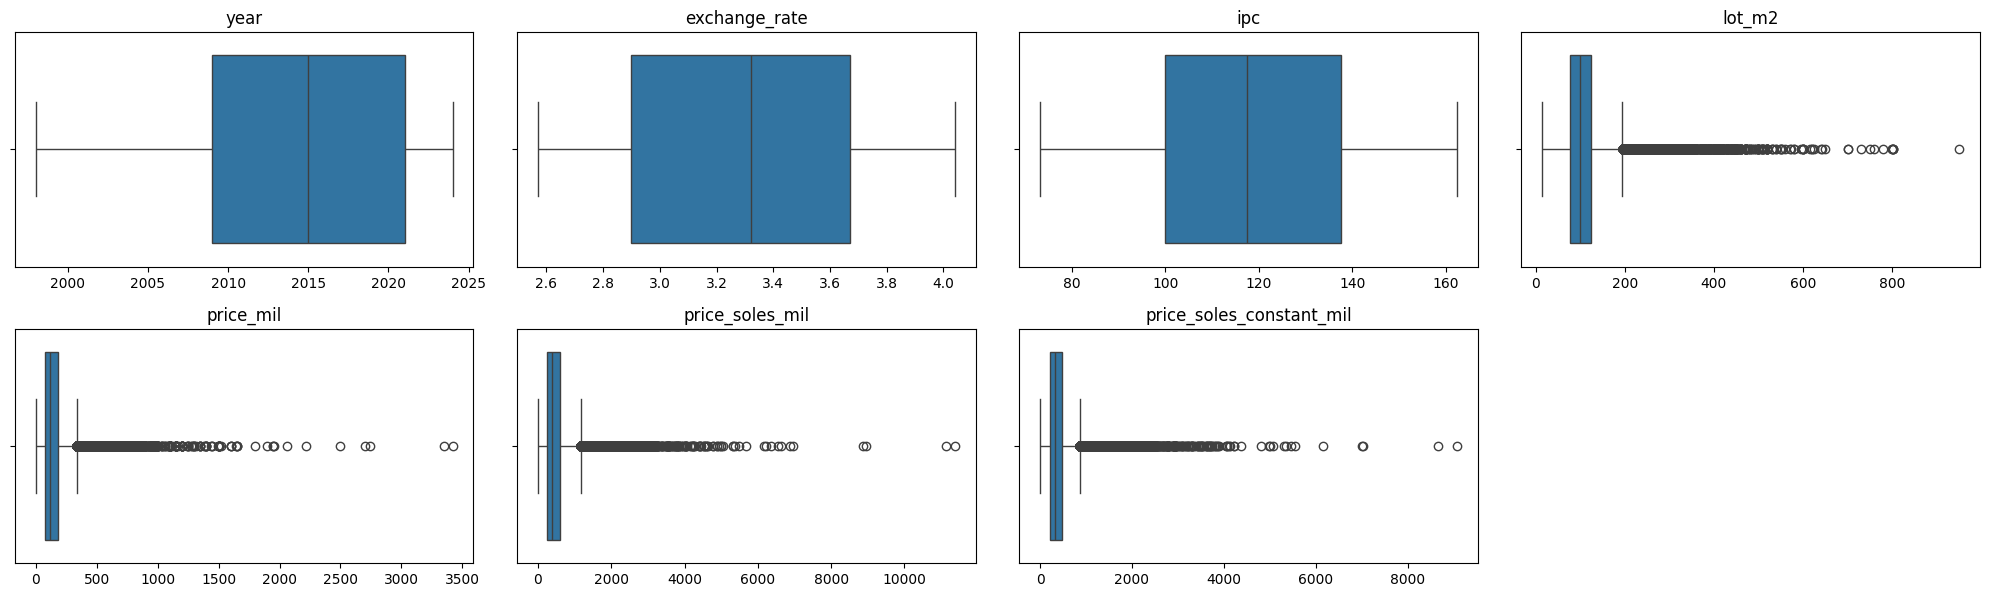

In [146]:
#Creando grafico de las columnas del dataframe sin duplicados ni valores faltantes
graf_filtered = plot_numeric_boxplots(df_filtered)
graf_filtered

### Detectando outliers

In [147]:
def detectar_outliers(df):
    outliers_dict = {}

    # Seleccionar solo las columnas numéricas
    numeric_columns = df.select_dtypes(exclude=['object']).columns

    for column in numeric_columns:
        # Calcular Q1, Q3 e IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Definir los límites para los outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detectar outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].tolist()
        outliers_dict[column] = outliers

    return outliers_dict

In [148]:
# Usar la función para detectar outliers en las columnas del dataframe
outliers = detectar_outliers(df_filtered)

# Capturando los nombres de las columnas que son de tipo númerico
numeric_columns = df_filtered.select_dtypes(exclude=['object']).columns

# Iterando en la lista de columnas númericas para obtener el número de valores atípicos
for column in numeric_columns:

    # Imprimiendo los números de valores atípicos de las columnas numericas
    print(f"En la columna {column} hay {len(outliers[column])} valores atípicos y representa el {round(len(outliers[column])/df_filtered[column].count()*100, 2)}% de los datos")


En la columna year hay 0 valores atípicos y representa el 0.0% de los datos
En la columna exchange_rate hay 0 valores atípicos y representa el 0.0% de los datos
En la columna ipc hay 0 valores atípicos y representa el 0.0% de los datos
En la columna lot_m2 hay 5274 valores atípicos y representa el 6.04% de los datos
En la columna price_mil hay 4269 valores atípicos y representa el 4.89% de los datos
En la columna price_soles_mil hay 3641 valores atípicos y representa el 4.17% de los datos
En la columna price_soles_constant_mil hay 4511 valores atípicos y representa el 5.17% de los datos


### Eliminando outliers fuertes

In [149]:
# Copiando dataframe antes de realizar cambios de valores atípicos
df_modified = df_filtered.copy()

# Capturando la media de cada columna númerica
mediana = {}

for column in numeric_columns:

    median = df_modified[column].median()

    mediana[column] = median

# Capturando la media de los las columnas
for column in numeric_columns:
    # Capturando lista de valores a cambiar de la columna
    outliers_column = outliers[column]

    # Cambiando los valores atípicos por su media
    df_modified.loc[df_modified[column].isin(outliers_column), column] = mediana[column]

# Usar la función para detectar outliers en las columnas del dataframe
outliers = detectar_outliers(df_modified)

# Iterando en la lista de columnas númericas para obtener el número de valores atípicos
for column in numeric_columns:

    # Imprimiendo los números de valores atípicos de las columnas numericas
    print(f"En la columna {column} hay {len(outliers[column])} valores atípicos y representa el {round(len(outliers[column])/df_filtered[column].count()*100, 2)}% de los datos")

En la columna year hay 0 valores atípicos y representa el 0.0% de los datos
En la columna exchange_rate hay 0 valores atípicos y representa el 0.0% de los datos
En la columna ipc hay 0 valores atípicos y representa el 0.0% de los datos
En la columna lot_m2 hay 1252 valores atípicos y representa el 1.43% de los datos
En la columna price_mil hay 1302 valores atípicos y representa el 1.49% de los datos
En la columna price_soles_mil hay 1567 valores atípicos y representa el 1.8% de los datos
En la columna price_soles_constant_mil hay 2177 valores atípicos y representa el 2.49% de los datos


### Valores atipicos finales

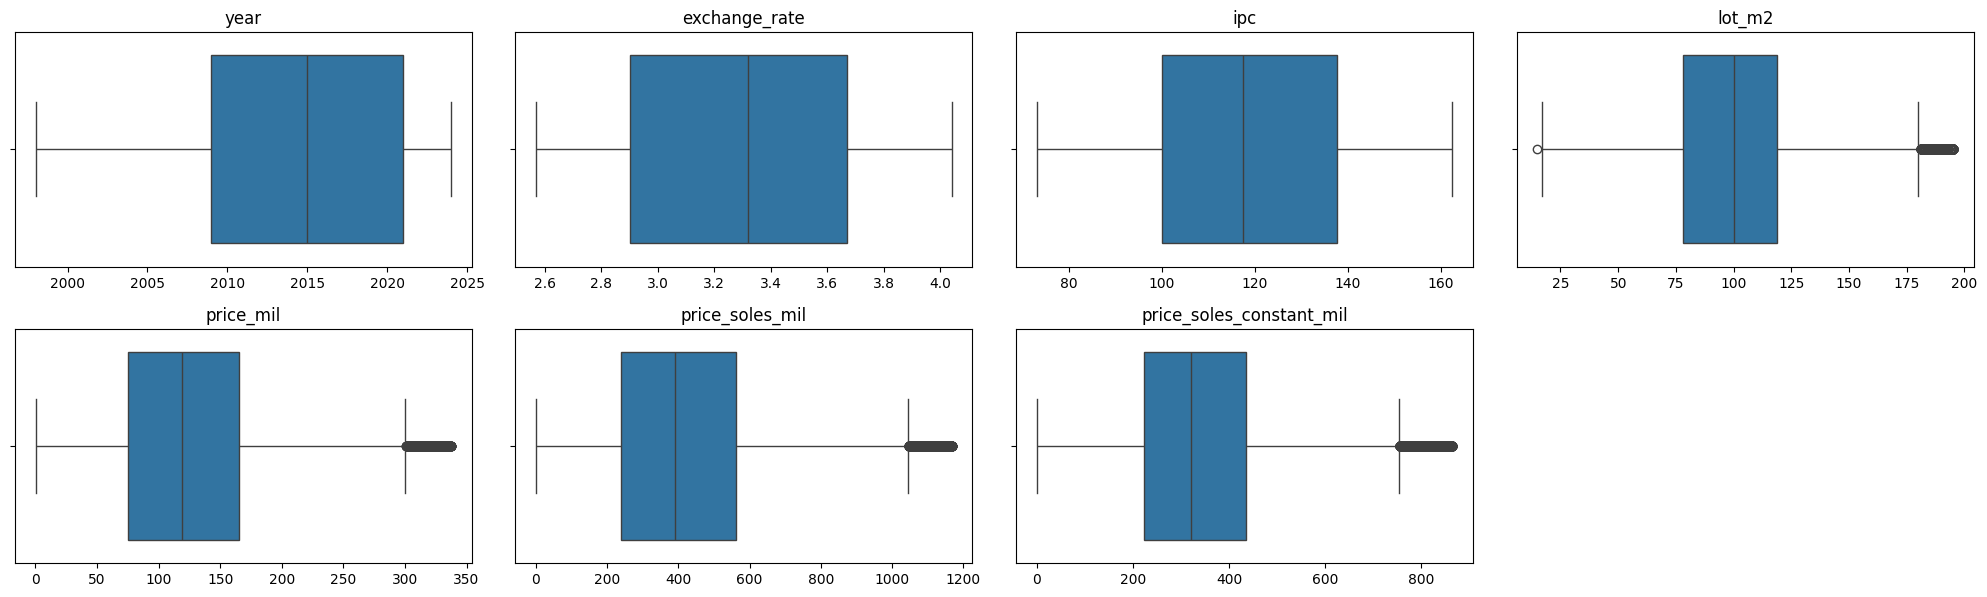

In [150]:
# Creando grafico de las columnas del dataframe sin duplicados ni valores faltantes
graf_modified = plot_numeric_boxplots(df_modified)
graf_modified

## Calcular estadísticas de una variable numérica y otra categórica

In [151]:
# Utilizando describe para verificar las estadisticas de las variables numéricas
df_modified.describe().head(10)

year  exchange_rate           ipc        lot_m2     price_mil  \
count  87258.000000   87258.000000  87258.000000  87258.000000  87258.000000   
mean    2013.911905       3.300476    119.332517    100.661418    127.129132   
std        7.272595       0.401246     25.591468     30.403816     67.160862   
min     1998.000000       2.570000     73.130000     15.000000      0.190000   
25%     2009.000000       2.900000     99.930000     78.000000     75.000000   
50%     2015.000000       3.320000    117.380000    100.000000    119.000000   
75%     2021.000000       3.670000    137.630000    119.000000    165.000000   
max     2024.000000       4.040000    162.440000    195.000000    337.500000   

       price_soles_mil  price_soles_constant_mil  
count     87258.000000              87258.000000  
mean        427.646664                346.625056  
std         239.414400                166.462510  
min           0.703000                  0.439000  
25%         239.642000                222.535000  
50%         389.884000                322.034500  
75%         562.250000                435.316000  
max        1167.368000                864.304000

In [152]:
# Creando lista de category_cols
category_cols = df_modified.select_dtypes(include=['object']).columns

# Iterando en cada columna categorica para determinar sus estadisticas
for col in category_cols:
    print(f"\nAnálisis de la columna categórica: '{col}'")

    # Calcular frecuencias y proporciones
    freq = df_modified[col].value_counts()
    prop = df_modified[col].value_counts(normalize=True)

    # Combinar frecuencias y proporciones en un DataFrame
    stats = pd.DataFrame({'Frecuencia': freq, 'Proporción': prop})
    stats['Proporción'] = stats['Proporción'].map('{:.2%}'.format)

    print(stats)


Análisis de la columna categórica: 'quarter'
         Frecuencia Proporción
quarter                       
4             22748     26.07%
3             22093     25.32%
1             21527     24.67%
2             20890     23.94%

Análisis de la columna categórica: 'state'
                 Frecuencia Proporción
state                                 
Surco                 13219     15.15%
Miraflores            12411     14.22%
San Borja              8381      9.60%
San Isidro             7630      8.74%
La Molina              7058      8.09%
San Miguel             5679      6.51%
Magdalena              4805      5.51%
Jesús María            3971      4.55%
Pueblo Libre           3858      4.42%
Lince                  3115      3.57%
Surquillo              2887      3.31%
Chorrillos             2884      3.31%
Barranco               2371      2.72%
Cercado de Lima        2115      2.42%
Los Olivos             1778      2.04%
Breña                  1482      1.70%
La Perla              

## Realizar el diagrama de barras de al menos una variable categórica

In [153]:
def plot_bar_chart(df, columny, columnx):

    # Calcular la mediana de los valores en 'columnx' agrupados por las categorías en 'columny'
    state_median = df.groupby(columny)[columnx].median().reset_index()

    # Ordenar los resultados por los valores en 'columnx'
    state_median_sorted = state_median.sort_values(by=columnx)

    # Crear una figura de tamaño 10x6 pulgadas
    plt.figure(figsize=(10, 6))

    # Generar el gráfico de barras horizontales
    bars = plt.barh(state_median_sorted[columny], state_median_sorted[columnx])

    # Añadir etiquetas de texto a las barras con los valores de la mediana
    for bar, price in zip(bars, state_median_sorted[columnx]):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'  {price:,.0f}',
                 va='center', ha='left', fontsize=6)

    # Ajustar el tamaño de la fuente de las etiquetas en el eje y
    plt.yticks(fontsize=6)

    # Etiquetar el eje x
    plt.xlabel(f'Media del {columnx}')

    # Etiquetar el eje y
    plt.ylabel(f'{columny}')

    # Ajustar el diseño del gráfico para evitar solapamiento
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

    return bars


### Variable de precio

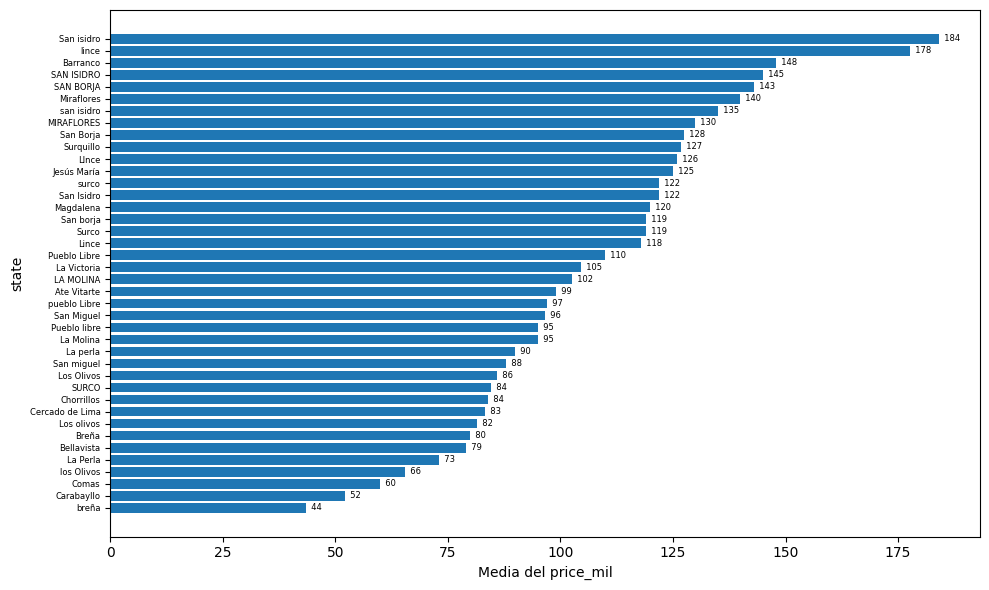

<BarContainer object of 40 artists>

In [154]:
# Creando grafico para la variable de "price_mil" como eje y la variable "state"
graf_price = plot_bar_chart(df_modified, 'state', 'price_mil')

# Imprimiendo el resultado
graf_price

### Variable de tamaño de casa

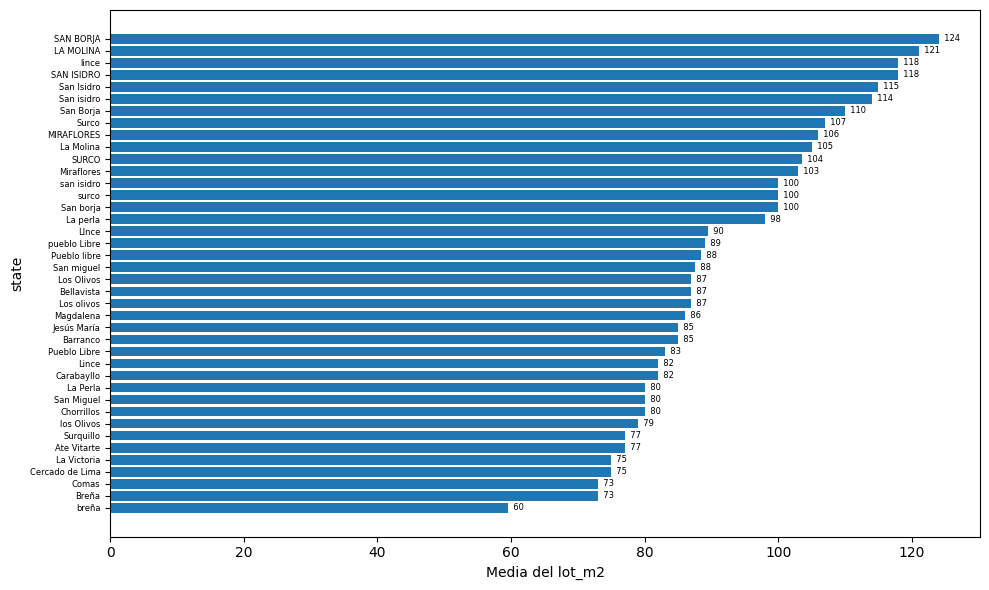

<BarContainer object of 40 artists>

In [155]:
# Creando grafico para la variable de "lot_m2" como eje y la variable "state"
graf_lot_m2 = plot_bar_chart(df_modified, 'state', 'lot_m2')

# Imprimiendo el resultado
graf_lot_m2

## Realizar el histograma de al menos una variable numérica

In [156]:
df_modified.select_dtypes(include=["float", "int"]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 87258 entries, 0 to 96586
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      87258 non-null  int64  
 1   exchange_rate             87258 non-null  float64
 2   ipc                       87258 non-null  float64
 3   lot_m2                    87258 non-null  int64  
 4   price_mil                 87258 non-null  float64
 5   price_soles_mil           87258 non-null  float64
 6   price_soles_constant_mil  87258 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 5.3 MB


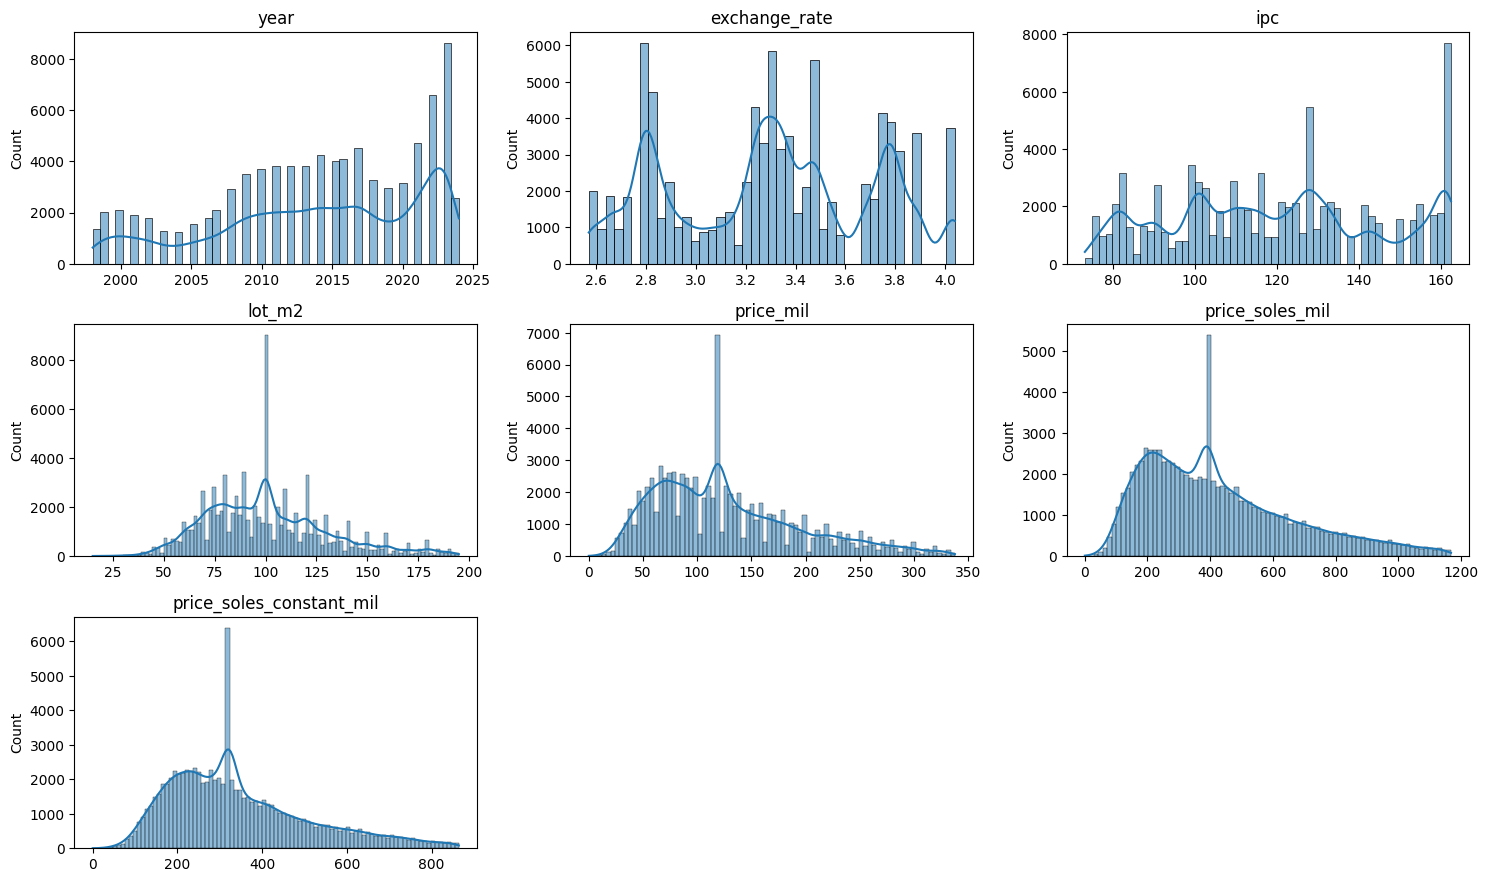

In [157]:
# Seleccionar columnas numéricas
numeric_columns = df_modified.select_dtypes(include=["float", "int"]).columns

# Calcular el número de filas y columnas para los subplots
n_cols = 3  # Número de columnas por fila
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3*n_rows))

# Ajustar el espacio entre los subplots
fig.subplots_adjust(hspace=0.5)

# Aplanar el array de ejes si es necesario
axes = axes.flatten() if n_rows > 1 else [axes]

# Iterar sobre las columnas numéricas
for i, column in enumerate(numeric_columns):
    # Gráfico de caja
    sns.histplot(x=df_modified[column], ax=axes[i] , kde=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')

# Ocultar subplots vacíos si los hay
for j in range(len(numeric_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Generar diagramas de dispersión

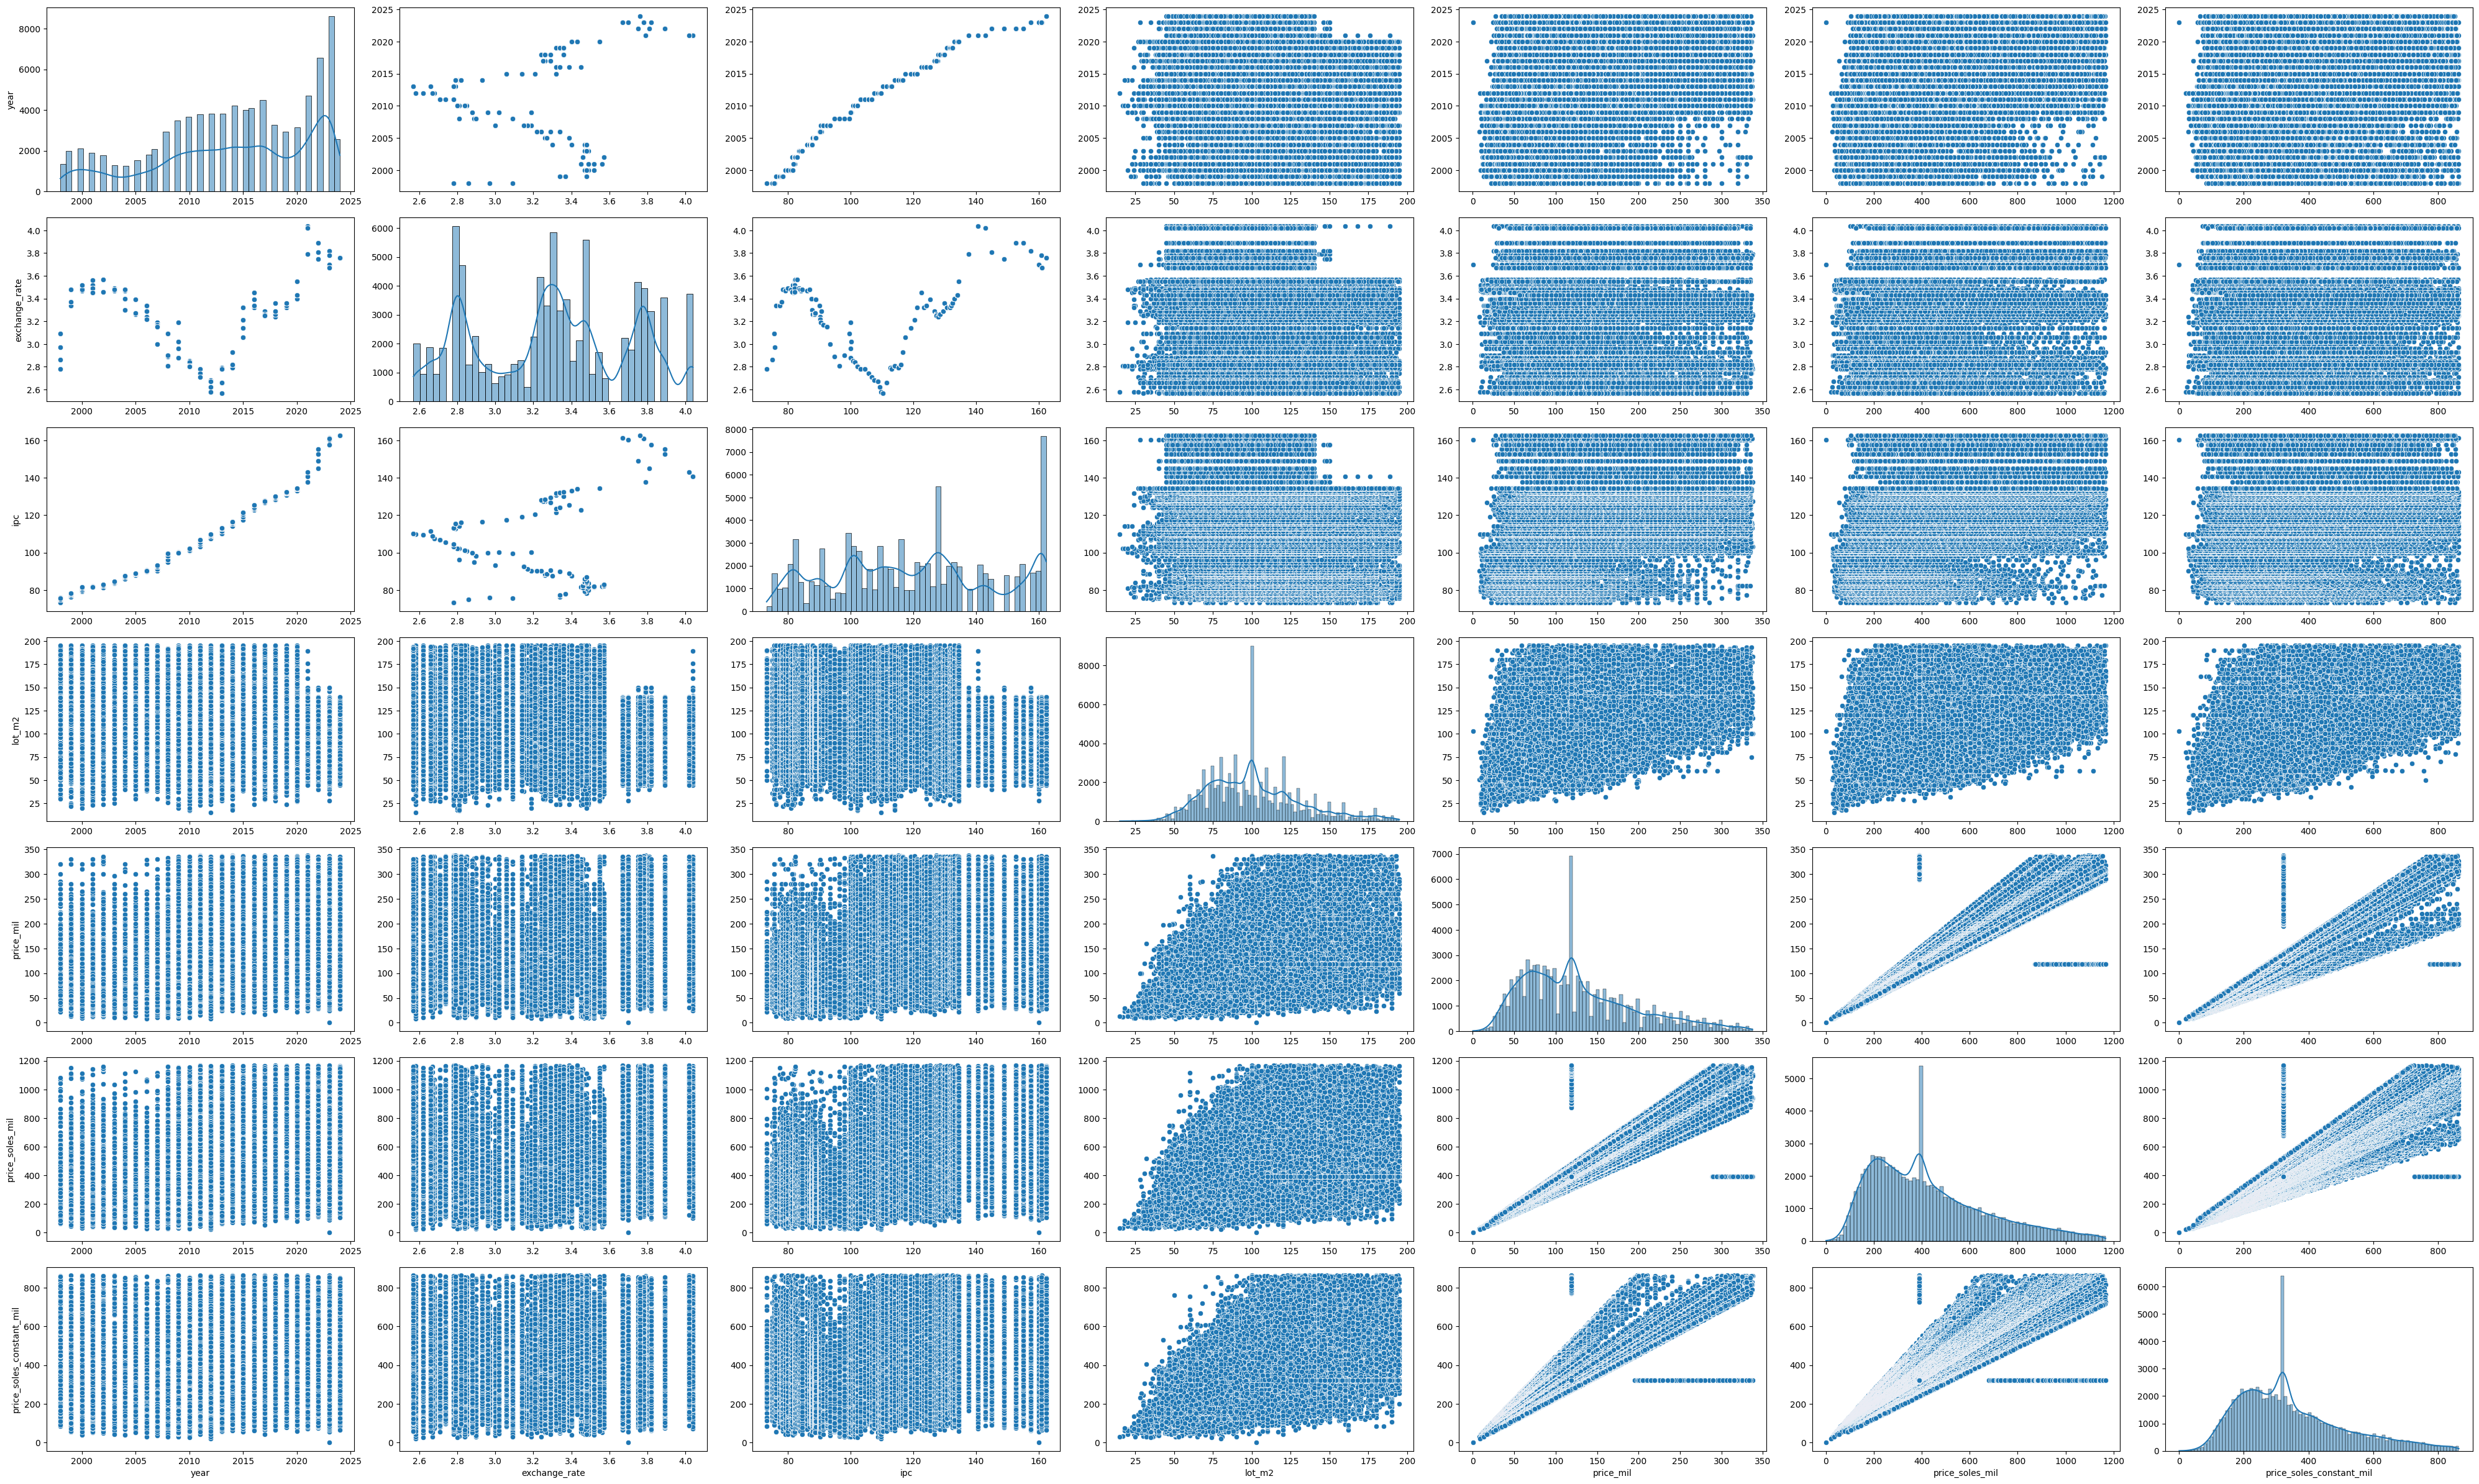

In [158]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_modified.select_dtypes(include=["float64", "int"]).columns

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=len(numeric_columns), figsize=(40, 24))

# Iterar sobre todas las combinaciones de columnas numéricas
for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        ax = axes[i, j]

        if i != j:
            # Crear diagrama de dispersión
            sns.scatterplot(data=df_modified, x=col2, y=col1, ax=ax)
        else:
            # Crear histograma en la diagonal
            sns.histplot(data=df_modified, x=col1, ax=ax, kde=True)

        # Ajustar etiquetas
        if i == len(numeric_columns) - 1:
            ax.set_xlabel(col2)
        else:
            ax.set_xlabel('')

        if j == 0:
            ax.set_ylabel(col1)
        else:
            ax.set_ylabel('')

# Ajustar el diseño
plt.tight_layout()
plt.show()

## Realizar correlación entre variables

In [159]:
def analyze_correlation(df, method='pearson', figsize=(12, 8)):
    # Seleccionar solo las columnas numéricas
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Calcular la matriz de correlación
    corr_matrix = numeric_df.corr(method=method)

    # Crear la figura
    plt.figure(figsize=figsize)

    # Crear el mapa de calor
    fig = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

    # Configurar el título
    plt.title(f'Matriz de Correlación {method.capitalize()}', fontsize=16)

    # Mostrar el gráfico
    plt.show()

    return fig

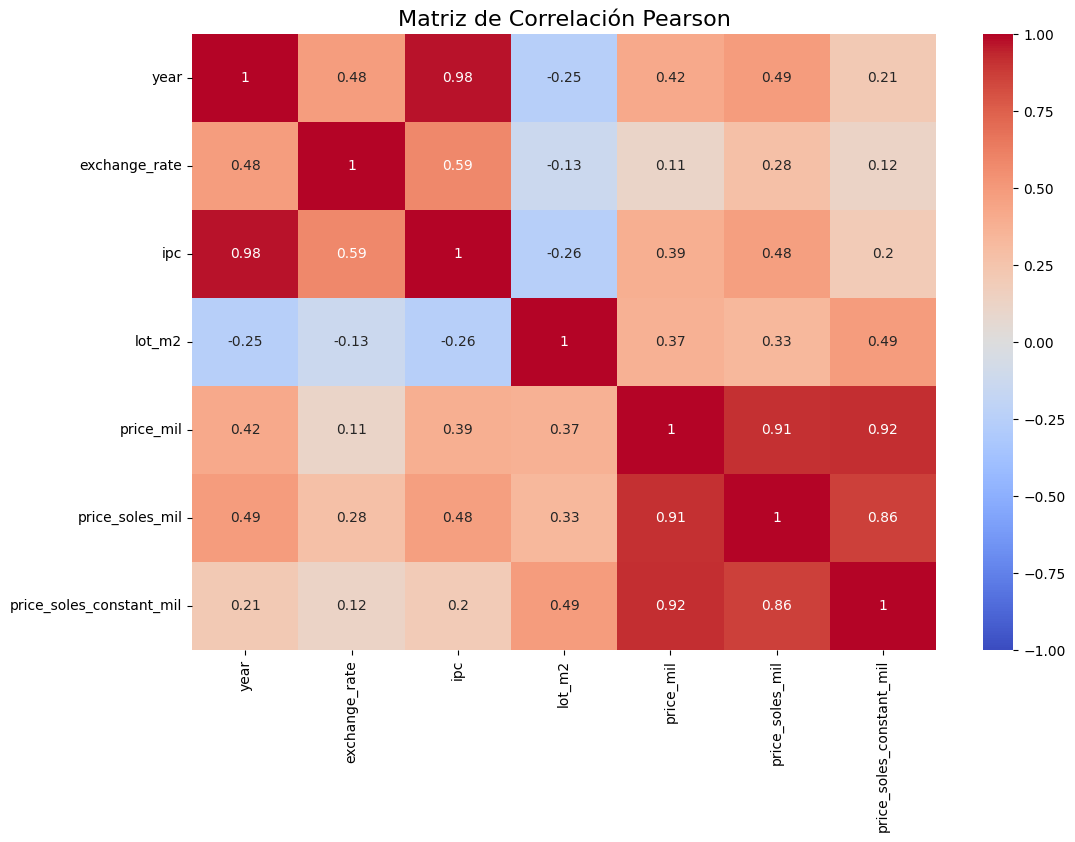

<Axes: title={'center': 'Matriz de Correlación Pearson'}>

In [160]:
analyze_correlation(df_modified)

## Mapear columnas categoricas

In [161]:
# Identificando las columnas tipo categoricas
df_modified.select_dtypes(include=['object']).columns

Index(['quarter', 'state', 'bed', 'bath', 'garage', 'floor_location',
       'exterior_view', 'years_old'],
      dtype='object')

In [162]:
df_mapped = df_modified.copy()
mapping_dict = {}

# Seleccionar las columnas categóricas
columns_to_map = df_mapped.select_dtypes(include=['object']).columns

for column in columns_to_map:
    if df_modified[column].dtype == 'object':
        # Usar LabelEncoder para mapear los valores
        le = LabelEncoder()
        df_mapped[column] = le.fit_transform(df_modified[column].astype(str))

        # Guardar el mapeo realizado a las columnas categoricas
        mapping_dict[column] = dict(zip(le.classes_, le.transform(le.classes_)))

        print(f"Columna '{column}' mapeada.")
        print(f"Mapeo: {mapping_dict[column]}\n")

Columna 'quarter' mapeada.
Mapeo: {'1': 0, '2': 1, '3': 2, '4': 3}

Columna 'state' mapeada.
Mapeo: {'Ate Vitarte': 0, 'Barranco': 1, 'Bellavista': 2, 'Breña': 3, 'Carabayllo': 4, 'Cercado de Lima': 5, 'Chorrillos': 6, 'Comas': 7, 'Jesús María': 8, 'LA MOLINA': 9, 'LInce': 10, 'La Molina': 11, 'La Perla': 12, 'La Victoria': 13, 'La perla': 14, 'Lince': 15, 'Los Olivos': 16, 'Los olivos': 17, 'MIRAFLORES': 18, 'Magdalena': 19, 'Miraflores': 20, 'Pueblo Libre': 21, 'Pueblo libre': 22, 'SAN BORJA': 23, 'SAN ISIDRO': 24, 'SURCO': 25, 'San Borja': 26, 'San Isidro': 27, 'San Miguel': 28, 'San borja': 29, 'San isidro': 30, 'San miguel': 31, 'Surco': 32, 'Surquillo': 33, 'breña': 34, 'lince': 35, 'los Olivos': 36, 'pueblo Libre': 37, 'san isidro': 38, 'surco': 39}

Columna 'bed' mapeada.
Mapeo: {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}

Columna 'bath' mapeada.
Mapeo: {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}

Columna 'garage' mapead

## Identificar la variable target y verificar el balance entre clase

In [163]:
target_var = 'price_mil'

print("Balance de clases:")

df_modified[target_var].value_counts(normalize=True)

Balance de clases:


price_mil
119.000    0.051663
120.000    0.017786
110.000    0.016033
75.000     0.015597
85.000     0.014509
             ...   
161.282    0.000011
194.700    0.000011
105.516    0.000011
161.975    0.000011
149.002    0.000011
Name: proportion, Length: 9555, dtype: float64